# AMS 326 Numerical Analysis HW 3

By: Mehadi Chowdhury (115112722)  

Link to GitHub where README, PDF, IPYNB and Seperate Python Files will be hosted: https://github.com/EmceeCiao/AMS_326_HW3 

## Background For Problem 3.1 


<div style="text-align: center;">
    <img src="Problem_3.1.png" alt="Photo of Problem 3.1 Buffon's Discs" style="width:1000px; border:2px solid black;"/>
</div> 

## Problem 3.1

### Problem Description  

For our project, instead of dropping needles, you perform numerical experiments for tossing a disc of diameter d (to be specified below) to parallel lines of distance w = 1. Estimate (numerically, of course) the probability when any part of the disc crosses a parallel line for n = 4,444,444 tosses with each of
the following disc diameters d = 1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 15/10, 20/10, 30/10 

For d < w, you may cross no more than 1 line and the crossing probability depends on “d”. For d > w, you may cross more than 1 line and, as such, you must specify the probabilities for crossing, at least, 1-, 2-, 3-, 4-... lines. 

Please estimate, and make a plot for, the probabilities as a function of d. 

### Algorithm Description 

Since we want to estimate and make a plot for the probabilities for this numerically, we are going to be using a Monte Carlo method to simulate the tossing of a disc with diameter, d, and seeing the number of lines it crosses if the width between each line is 1. To accomplish this however, we must figure out how we are going to simulate this and under what conditions we would reject or accept the result of the simulation for our purposes. I came up with the following method to simulate this disc toss, though they're maybe other methods people can explore to accomplish the same result.    

I noticed that a condition where a line or lines are crossed is if the starting point (bottom) of the disk/the height it's placed at in between two lines is high enough for it's diameter to intersect the next line. Using this idea, we could simulate the experiment by simply generating uniformly distributed random heights for the circle to start at and using the diameter to determine if it crosses or not. I did this by taking the width of the total number of lines crossed and subtracting our diameter from it, giving us the height needed, and then comparing this to the randomly generated height. If our height is greater than or equal to this height needed than we know the circle will be intersecting the next line! This works fine for rejecting as well because if the height needed is > 1 then, our method knows it's impossible as we can't have a height greater than one. Additionally, in the problem we were given that d crosses lines with 100 percent probability if d > the number of lines that needs to be crossed so that was accounted for in my method as well. 

So now that we were able to figure out how to simulate the disc tosses and our acceptance/rejection region, we can simulate the tosses to calculate the probabilities! 

#### Psuedocode 

**Monte Carlo Buffon's Disk Simulation**  

---
$diameters \leftarrow [1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 15/10, 20/10, 30/10] $        
$num\_tosses \leftarrow 4444444 $           
$crossing\_probabilities \leftarrow [] $      
$\text{for diameter in diameters: }$    
&emsp; $succesful\_tosses = [] $  
&emsp; $\text{for j in range(1, 5):}$    
&emsp;&emsp; $\text{Repeat num\_tosses times:}$     
&emsp;&emsp;&emsp; $bottom = uniform\_random(0, 1)$     
&emsp;&emsp;&emsp; $\text{if diameter > j: sucessful\_tosses[j] += num\_tosses and break}$    
&emsp;&emsp;&emsp; $\text{if (diameter < j) and (j - diameter > 1): sucessful\_tosses[j] = 0 and break}$     
&emsp;&emsp;&emsp; $\text{if bottom >= diameter - j: sucessful\_tosses[j] += 1}$     
&emsp; $probabilities = [] $  
&emsp; $\text{for val in sucessful\_tosses:}$  
&emsp;&emsp; $probabilities.append(val/num\_tosses)$    
&emsp; $crossing\_probabilities.append(probabilities)$     

return $crossing\_probabilities$  

---

#### Code 

{0.1: [0.100256860025686, 0.0, 0.0, 0.0], 0.2: [0.199720819972082, 0.0, 0.0, 0.0], 0.3: [0.300340380034038, 0.0, 0.0, 0.0], 0.4: [0.40018031501803153, 0.0, 0.0, 0.0], 0.5: [0.5002625750262575, 0.0, 0.0, 0.0], 0.6: [0.600270810027081, 0.0, 0.0, 0.0], 0.7: [0.7003186450318645, 0.0, 0.0, 0.0], 0.8: [0.800081180008118, 0.0, 0.0, 0.0], 0.9: [0.899979839997984, 0.0, 0.0, 0.0], 1.0: [1.0, 0.0, 0.0, 0.0], 1.5: [1.0, 0.499984249998425, 0.0, 0.0], 2.0: [1.0, 1.0, 0.0, 0.0], 3.0: [1.0, 1.0, 1.0, 0.0]}


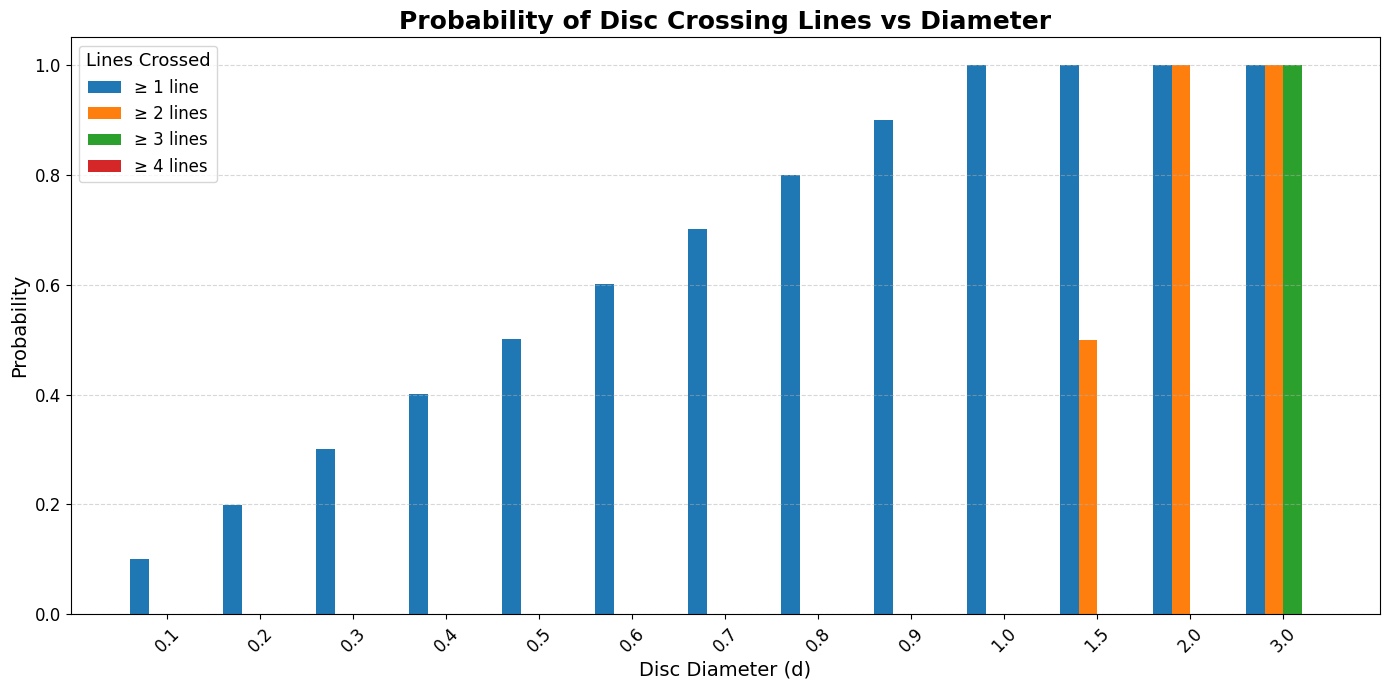

Printing Table of Probabilities From Simulation: 
+-----------------+-----------------+-----------------+-----------------+-----------------+
| Diameter (d)    | P(≥1 line)      | P(≥2 lines)     | P(≥3 lines)     | P(≥4 lines)     |
+=================+=================+=================+=================+=================+
| 0.10            | 0.100256860026  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.20            | 0.199720819972  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.30            | 0.300340380034  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.40            | 0.400180315018  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.50            | 0.500262575026  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.60            | 0.600270810027  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.70            | 0.700318645032  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.80            | 0.80008118

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 

def simulate_disc_tosses(diameter, num_tosses):    
    """
    Function to simulate tossing a disc and the lines it crosses  

    Inputs: 
    - diameter: diameter of the disc being tossed  
    - num_tosses: Number of tosses being simulated 

    Outputs: 
    - probabilities: Full array of probabilities for it crossing x number of lines
      meaning 1 line, 2 lines, 3 lines or 4 lines
    """
    # Hashmap to store successful tosses per number of lines being crossed
    successful_tosses = {} 
    for j in range (1, 5): # represents lines being crossed (1 - 4) 
        # print(f"Simulating Crossing {j} lines")   
        # Simulates the bottom/start of the circles num_tosses times
        bottom = np.random.uniform(0, 1, num_tosses) 
        if diameter >= j: # Given in problem
            successful_tosses[j] = num_tosses
        elif diameter < j and j - diameter > 1: 
            successful_tosses[j] = 0 
        else:   
            # We check if any of our bottoms lets us cross a line after crossing  
            # other lines due to the height needed
            height_needed = j - diameter 
            success = np.sum(bottom >= height_needed) 
            successful_tosses[j] = float(success) 
    # Array to store probabilities 
    probabilities = [] 
    for value in successful_tosses.values():   
        # Probability is the number of successes/total
        probabilities.append(value/num_tosses)  
    # print(f"Probabilities for {diameter}: {probabilities}")
    return probabilities # Full array of probabilities for it crossing x-line, meaning 1, 2, 3, 4   

def monte_carlo_disc_toss(diameters, num_tosses):  
    """
    Function to call on list of diameters that we want to simulate tosses for 

    Inputs: 
    - diameters: List of diameters for discs being  
    - num_tosses: Number of tosses being simulated 

    Outputs: 
    - crossing_probabilities: A dictionary of lists of the  
    probabilities of each diameter crossing 1-4 lines 
    """
    # So now this function will actually run this simulation and store the crossing probabilities for each thing  
    crossing_probabilities = {} 
    for diameter in diameters:  
        # print(f"Simulating Diameter: {diameter}") 
        probabilities = simulate_disc_tosses(diameter, num_tosses)  
        crossing_probabilities[diameter] = probabilities  
    return crossing_probabilities  

diameters = [1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 15/10, 20/10, 30/10] 
num_tosses = 4444444 

results = monte_carlo_disc_toss(diameters, num_tosses)  
print(results)
x = list(results.keys())
y1 = [results[d][0] for d in x]  # ≥1 line
y2 = [results[d][1] for d in x]  # ≥2 lines
y3 = [results[d][2] for d in x]  # ≥3 lines
y4 = [results[d][3] for d in x]  # ≥4 lines

# Bar width and positioning
bar_width = 0.2
x_indices = np.arange(len(x))

plt.figure(figsize=(14, 7))

# Shifted bars for each group
plt.bar(x_indices - 1.5 * bar_width, y1, width=bar_width, label="≥ 1 line")
plt.bar(x_indices - 0.5 * bar_width, y2, width=bar_width, label="≥ 2 lines")
plt.bar(x_indices + 0.5 * bar_width, y3, width=bar_width, label="≥ 3 lines")
plt.bar(x_indices + 1.5 * bar_width, y4, width=bar_width, label="≥ 4 lines")

# Aesthetics
plt.title("Probability of Disc Crossing Lines vs Diameter", fontsize=18, weight='bold')
plt.xlabel("Disc Diameter (d)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.xticks(x_indices, [f"{d:.1f}" for d in x], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Lines Crossed", fontsize=12, title_fontsize=13)
plt.tight_layout()

plt.show()


print("Printing Table of Probabilities From Simulation: ")
# Get all diameters
diameters = results.keys()

# Header
headers = ["Diameter (d)", "P(≥1 line)", "P(≥2 lines)", "P(≥3 lines)", "P(≥4 lines)"]
col_widths = [15, 15, 15, 15, 15]  # Fixed widths for alignment

# Function to pad each cell
def format_row(values, widths): 
    """ 
    Prints the string we want in this case our values with the correct padding
    """
    return "| " + " | ".join(str(v).ljust(w) for v, w in zip(values, widths)) + " |"

# Print top border
print("+" + "+".join("-" * (w + 2) for w in col_widths) + "+")

# Print header row
print(format_row(headers, col_widths))

# Print header separator
print("+" + "+".join("=" * (w + 2) for w in col_widths) + "+")

# Print rows
for d in diameters:
    row = [f"{d:.2f}"] + [f"{p:.12f}" for p in results[d]]
    print(format_row(row, col_widths))

# Print bottom border
print("+" + "+".join("-" * (w + 2) for w in col_widths) + "+")


### Results 

While the results of this monte carlo simulation will not be the exact same each time, it will be similar, and thus a plot and a table were made showcasing one instance of running this simulation below. 

The plot representing the probabilities as a function of d that we constructed is as follows:  


![Bar Graph of probabilities as a function of d for simulated disc tosses](Problem_3.1_Graph.png)   

I also constructed a table of the probabilities below:  

\begin{array}{|l|c|c|c|c|} \hline \textbf{Diameter} & \textbf{P >= 1 Lines} & \textbf{P >= 2 Lines} & \textbf{P >= 3 Lines} & \textbf{P >= 4 Lines} \\ \hline \text{0.1} & 0.100256860025686 & 0 & 0 & 0 \\ \text{0.2} & 0.199720819972082 & 0 & 0 & 0 \\ \text{0.3} & 0.300340380034038 & 0 & 0 & 0 \\ \text{0.4} & 0.40018031501803153 & 0 & 0 & 0  \\ \text{0.5} & 0.5002625750262575 & 0 & 0 & 0 \\ \text{0.6} & 0.600270810027081 & 0 & 0 & 0 \\ 
\text{0.7} & 0.7003186450318645 & 0 & 0 & 0 \\ \text{0.8} & 0.800081180008118 & 0 & 0 & 0 \\ \text{0.9} & 0.899979839997984 & 0 & 0 & 0 \\ \text{1.0} & 1.0 & 0 & 0 & 0 \\ \text{1.5} & 1.0 & 0.499984249998425 & 0 & 0 \\ \text{2} & 1.0 & 1.0 & 0 & 0 \\ \text{3} & 1.0 & 1.0 & 1.0 & 0 \\   \hline \end{array}

### Performance 

The performance of a montecarlo simulation is dependent on how many simulations of an event you are performing and how costly it is to simulate such event. In this case as our simulation isn't too costly we can say the time complexity is O(n) where n is the number of simulations being asked for. In terms of space complexity, it is also O(n) as we need to store all the results of our simulations to calculate the probabilities of us tossing discs. 



## Background For Problem 3.2


<div style="text-align: center;">
    <img src="Problem_3.2.png" alt="Image of Problem 3.2" style="width:1000px; border:2px solid black;"/>
</div> 

## Problem 3.2

### Problem Description 

Given the rose curve $r = sin(2\theta)$ we are tasked with writing a program that will enable us to place a rectangle cutter of sides 1 x $\dfrac{1}{\sqrt 2}$ to cut the most area of the rose.  

### Algorithm Description   
To solve this optimization problem of writing a program that will place a rectangular cutter to cut most of the area of the rose we took advantage of a monte carlo method. Initially, I had actually did a brute force greedy grid search but after considering the problem longer, I adapted this grid search to instead use Simulated Annealing as this would be more effective then the exhaustive enumeration my grid search was performing. 

Simulated Annealing is very similar to the Metropolis method as both start with some state X, generate a new state Y that's a small move from X and then decide whether we accept or reject this new state, rinse and repeat. The difference now lies in how we accept or reject points as we adjust our temperature for acceptance as our program continues. 

With this in mind, I made the following design decisions:  
  
1) To adjust the cooling and I decided to do exponential cooling and let the programmer decide where the temperature should start and end as this is a popular choice for many similar programs (In this case intial was 0.1, final was 0.0001).  

2) For accuracy, I played around with the number of iterations and points generated as this determined the accuracy of our method. After a bit of trial and error and taking into account how long I wanted the program to run for, I decided 20,000 iterations and 400 points was a good middle ground for accuracy and speed. 

3) From moving from state X to state Y, I decided to use a normal distribution and provide it with the standard deviation of the distribution. I chose 0.02 for the point deviation but 0.01 for the angle deviation as we are performing many iterations and the points and angles should not be changing at the same rate. 

So for the overall flow of my program, I first generate points and mask for the points inside the clover. Taking this, I start performing simulated annealing where based off random inital conditions of 0-0.1,0-0.1,0-0.01 I check which of these clover points are in the rectangular cutter. We set this as our best guess and we repeat simulated annealing, rejection or accepting based off of our temperature and stopping after out set iterations. I then print out the best guess for maximizing the area, the area gotten from this best guess, the full area of the clover, and I show graphically what this solution is. 


Note: The program may take 1-3 minutes to run due to the number of iterations and points generated! 

#### Psuedocode 

**Simulated Annealing - Clover Cutter**

--- 
$clover\_points, step \leftarrow \text{generate points inside clover}$         
$x\_center \leftarrow random(0.0, 0.1) $         
$y\_center \leftarrow random(0.0, 0.1) $        
$alpha \leftarrow random (0.0, 0.01)$    
$iterations \leftarrow 20000$       
$T\_init \leftarrow 0.1 $      
$T\_final \leftarrow 0.0001$      
$decay = (T\_final/T\_init)^{1.0/iterations}$     

$transformed\_points \leftarrow \text{rotate\_and\_shift(clover\_points)}$     
$mask \leftarrow \text{inside\_rectangle(transformed\_points)} $            
$current\_score \leftarrow \text{sum(mask)}$    
$best\_score \leftarrow current\_score $          
$best\_params \leftarrow (x\_center, y\_center, alpha) $         

$Temp \leftarrow T\_init$     
$\text{for iterations:}$         
&emsp; $ new\_x\_center = \text{random.normal(sigma = 0.02) + x\_center} $        
&emsp; $ new\_y\_center = \text{random.normal(sigma = 0.02) + y\_center} $      
&emsp; $ new\_angle = \text{(random.normal(sigma = 0.01) + angle) mod pi} $       
&emsp; $transformed\_points \leftarrow \text{rotate\_and\_shift(clover\_points)}$     
&emsp; $mask \leftarrow \text{inside\_rectangle(transformed\_points)} $     
&emsp; $new\_score \leftarrow \text{sum(mask)} $          
&emsp; $delta \leftarrow \text{new\_score - best\_score} $     
&emsp; $\text{if delta > 0 or random() <} e^{delta/T} \text{:}$      
&emsp;&emsp; $x\_center, y\_center, alpha =  new\_x\_center, new\_y\_center, new\_angle$    
&emsp;&emsp; $current\_score = new\_score$     
&emsp;&emsp; $\text{if new\_score > best\_score:}$    
&emsp;&emsp;&emsp; $best\_score = new\_score$   
&emsp;&emsp;&emsp; $best\_params = (x\_center, y\_center, alpha) $           
&emsp; $Temp*=decay $       

$total\_area = best\_score * (step^2)$    
return $best\_params, best\_score, total\_area$     

---

#### Code 

Approximate Best Value For Center X: 0.0026
Approximate Best Value For Center Y: -0.0028
Approximate Best Value For Angle: 0.0011 radians (0.06°)
Number Of Sampled Points in Cutter: 23572
Approximate Area Covered by Cutter: 0.589300
Approximate Actual Area of Clover: 0.785398


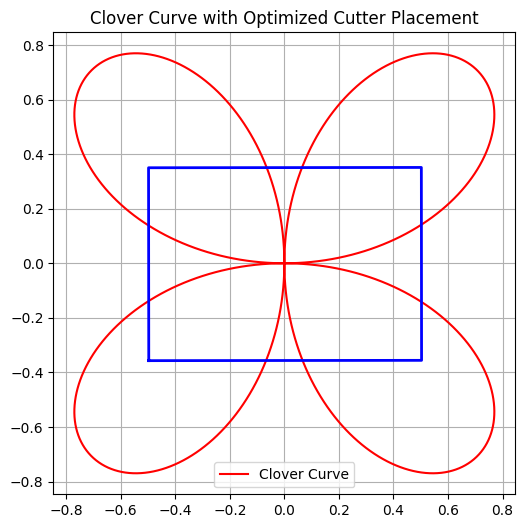

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def clover_curve(theta): 
    """
    Provides Integrand for Computing Overall Clover Area
    """
    return np.sin(2 * theta) 

def compute_overall_area():
    """
    Computes the approximate total area of the clover shape using polar integral.
    """
    def integrand(theta):
        return clover_curve(theta)**2

    theta_min = 0
    theta_max = np.pi
    num_intervals = 100
    delta_theta = (theta_max - theta_min) / num_intervals

    area_sum = 0
    for i in range(num_intervals):
        theta_i = theta_min + i * delta_theta
        theta_ip1 = theta_min + (i + 1) * delta_theta
        area_sum += (integrand(theta_i) + integrand(theta_ip1)) * delta_theta / 2

    # Multiply by 1/2 for polar integral
    return area_sum / 2

def inside_clover(x, y): 
    """ 
    Equation to check if points lie inside clover 
    """ 
    return (x**2 + y**2)**3 <= 4 * x ** 2 * y ** 2   

def inside_rectangle(points, width, height):  
    """
    Function to return points inside the rectangle  
    Inputs: 
    - points: clover points (numpy array)
    - width: width of rectangle 
    - height: height of rectangle
    """ 
    half_width = width/2 
    half_height = height/2

    x = points[:, 0] 
    y = points[:, 1] 
    
    inside_rect = (np.abs(x) <= half_width) & (np.abs(y) <= half_height) 
    return inside_rect 

def generate_clover_points(num_points): 
    """ 
    Function to generate points inside of clover 
    Uses inside_clover as a mask and generates points inside of bounding box -1, 1 
    """ 
    x_points = np.linspace(-1, 1, num_points + 1) 
    y_points = np.linspace(-1, 1, num_points + 1)    

    step = x_points[1] - x_points[0]
    
    # Mesh Grid is returning x poins repeated over and over, and same with y points 
    xx, yy = np.meshgrid(x_points, y_points)   

    # xx.ravel() and yy.ravel() give the flattend version of these
    grid = np.column_stack((xx.ravel(), yy.ravel()))  

    # The grid is now a collection of points in the form (x, y)

    # We care about clover points however so let's mask this  
    # To do this masking we need a truth array or table for each point 
    x = grid[:, 0]  
    y = grid[:, 1] 
    mask = inside_clover(x, y)
    return grid[mask], step  

def transformation(points, xc, yc, alpha):  
    """ 
    Function to transform clover points as if the rectangle was rotated 
    and transformed as we are meant to simulate the center and angle of 
    the rectangle changing 
    """
    # we need to translate each point and now we need to rotate it 
    translated = points - np.array([xc, yc]) 
    sin = np.sin(alpha) 
    cos = np.cos(alpha)   

    # Rotation Matrix Definition
    rotation_matrix = np.array([[cos, -sin],[sin, cos]]) 

    rotated = np.dot(translated, rotation_matrix)  

    return rotated 

# Now that we've transformed we gotta try different inputs and check what's in the rectangle now 
def simulated_annealing_search(points, step, width, height, T_init, T_final, iterations, sigma_xy, sigma_angle):   
    """ 
    Simulated Annealing Code To Try Different Rotations to Maximize 
    Area Cut by Rectangle Cutter 

    Inputs: 
    - points: clover points 
    - step: step for the clover points/grid 
    - width/height: of rectangle
    - T_init: Initial Temperature chosen 
    - T_final: Final Temperature to cool down to 
    - Iterations: Number of Iterations to be done 
    - sigma_xy: normal distribution scale for x, y adjusting
    - sigma_angle: normal distribution scale for alpha adjusting 

    Outputs: 
    - Best
    """
    # Intial State/Guess
    xc, yc, alpha = np.random.uniform(low = 0, high = 0.1), np.random.uniform(low=0, high = 0.1), np.random.uniform(low = 0, high = 0.01) 
    transformed_points = transformation(points, xc, yc, alpha) 
    mask = inside_rectangle(transformed_points, width, height) 
    current_score = np.sum(mask) 

    best_score = current_score 
    best_params = (xc, yc, alpha) 

    # Set up Decay Factor 
    T = T_init 
    decay = (T_final/T_init) ** (1.0/iterations)  

    # Now we iterate
    for _ in range (iterations):      
        # Set up Proposed New Guess
        delta_point_x = np.random.normal(scale=sigma_xy) 
        delta_point_y = np.random.normal(scale=sigma_xy) 
        delta_angle = np.random.normal(scale=sigma_angle)
        xc_new = xc + delta_point_x 
        yc_new = yc + delta_point_y
        alpha_new = (alpha + delta_angle) % np.pi # mod pi to prevent looping 
        
        # New State From New Guess
        transformed_points = transformation(points, xc_new, yc_new, alpha_new) 
        mask_new = inside_rectangle(transformed_points, width, height) 
        new_score = np.sum(mask_new)     

        # Acception or Rejection Field
        delta = new_score - current_score 
        if delta > 0 or np.random.rand() < np.exp(delta/T):  
            xc, yc, alpha = xc_new, yc_new, alpha_new 
            current_score = new_score 
            if new_score > best_score:  
                best_score = new_score
                best_params = (xc, yc, alpha)      

        # Decay
        T *= decay        

    # Area cut by rectangle
    total_area = best_score * (step ** 2)
    return best_params, best_score, total_area
 

clover_points, step = generate_clover_points(400) 
best_params, best_score, total_area = simulated_annealing_search(clover_points, step, 1, 1/np.sqrt(2), 0.1, 0.0001, 20000, 0.02, 0.01) 

print(f"Approximate Best Value For Center X: {best_params[0]:.4f}")
print(f"Approximate Best Value For Center Y: {best_params[1]:.4f}")
print(f"Approximate Best Value For Angle: {best_params[2]:.4f} radians ({np.degrees(best_params[2]):.2f}°)")
print(f"Number Of Sampled Points in Cutter: {best_score}")
print(f"Approximate Area Covered by Cutter: {total_area:.6f}")
print(f"Approximate Actual Area of Clover: {compute_overall_area():.6f}")


def draw_rotated_rectangle(ax, xc, yc, alpha, width=1.0, height=1/np.sqrt(2)): 
    """
    Function to help plot rotated angle that was found! 
    """
    hw, hh = width / 2, height / 2
    corners = np.array([
        [-hw, -hh], [hw, -hh], [hw, hh], [-hw, hh], [-hw, -hh]
    ])
    c, s = np.cos(alpha), np.sin(alpha)
    R = np.array([[c, -s], [s, c]])
    rotated = (corners @ R.T) + np.array([xc, yc])
    ax.plot(rotated[:, 0], rotated[:, 1], 'b-', lw=2)


# Generate clover curve to be plotted
theta = np.linspace(0, 2 * np.pi, 1000)
r = clover_curve(theta)
x = r * np.cos(theta)
y = r * np.sin(theta)

# Plot Code Below 
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, y, 'r-', lw=1.5, label="Clover Curve")
draw_rotated_rectangle(ax, best_params[0], best_params[1], best_params[2])
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Clover Curve with Optimized Cutter Placement")
ax.legend()
plt.show()

### Results 

The results for this method are not fixed, as simulated annealing and other monte carlo family methods do not have exactly fixed results as they rely on randomness. However, they're convergence is always around the same answer or answers so one instance of results was as follows: 
  
Approximate Best Value For Center X: 0.0026     
Approximate Best Value For Center Y: -0.0028     
Approximate Best Value For Angle: 0.0011 radians (0.06°)    
Number Of Sampled Points in Cutter: 23572     
Approximate Area Covered by Cutter: 0.589300    
Approximate Actual Area of Clover: 0.785398    

Graph Below: 

![alt text](Problem_3.2_Graph.png)     


### Performance  

In the case of this program the run time of the code is O(I * N) where N is the number of clover points and I is the number of iterations. This is because while the simulated annealing does stop after I iterations, each iteration needs to calculate our objective, in this case, our objective deals with the number of clover points we are generating as we are attempting to maximize area of the clover cut by a rectangle cutter, so I * N. In terms of space complexity, the code has a space complexity of O(N) where N is the number of clover points once again as we need to store the clover points generated to even evaluate our objective. 


## Background For Problem 3.3 

<div style="text-align: center;">
    <img src="Problem_3.3.png" alt="Problem_3.3.png" style="width:1200px; border:2px solid black;"/>
</div> 



## Problem 3.3

### Problem Description 

Given a DE for the velocity of a plane starting at (a, 0) and approaching the airport at (0, 0) being the following:  

$$
\begin{cases} 
\dfrac{dy}{dx} = \dfrac{y}{x} - k\sqrt{1 + \left(\dfrac{y}{x}\right)^2} \\ 
y(x = a) = 0
\end{cases}  
$$
where $k = \dfrac{w}{v_0}$ 

Solve the DE given the values $a = 100$, $w = 44$, and $v_0 = 88$. Please use any solution method including Euler's methods and the Runge-Kutta to compute the plane's trajectory until it lands at the airport.  

### Algorithm Description  

To solve this ODE, I decided to use Euler's forward method as it was straightforward to understand and code. The essential idea behind Euler's forward method is that from any point on a curve, we can get an approximation of a nearby point by moving along the tangent line. In our case since we are given the slope at a point (the differential) and the anchor point to start (a, 0), we have everything needed to do so, we simply need to decide a value of h, which in this case I chose 0.0001 for more accuracy without running into a division of 0 error in the formuala.

More formally this was derived by taking the forward difference approximation of a derivative and solving: 

$y'(x)\approx (y(x+h) - y(x))/h$   
$y(x+h) \approx y(x) + h * y'(x)$     
$y' = f(x, y(x))$        
$y(x+h) \approx y(x) + h * f(x, y(x))$    

So with a step size of h we construct the sequence:  
$x_0, x_1 = x_0 + h, x_2 = x_1 + h, ....$ and the numerical solutions are
$y_{n+1} \approx y_{n} + h * f(x_n, y_n)$

So using the sequence above we can construct the trajectory of the plane. The only caveats I had to account for was that we wanted x to change negatively as our target of (0, 0) was the stopping point for this trajectory, so instead of adding h I subtracted by h for calculating the next $x_n$ meaning we also needed to change the sign for calculating $y_{n+1}$ as I needed to subtract from $y_n$ now. Additionally, I graphed the trajectory of the curve and printed 100 points on the trajectory to visualize the trajectory that's been constructed. I also put in a safe guard to make sure our answer did not overshoot hitting x = 0, by changing the step size at the very end if it was closer than h away. 

#### Psuedocode 

**Euler Forward Method**   

---
$a \leftarrow 100$    
$w \leftarrow 44$    
$v_0 \leftarrow 88$    
$x_0 \leftarrow a$    
$y_0 \leftarrow 0$    
$target \leftarrow 0$    
$k \leftarrow w/v_0$  
$h \leftarrow 0.0001$   
$f \leftarrow (y/x) - (k * \sqrt{1 + ((y/x)^2)})$     

$x\_vals \leftarrow [x_0]$    
$x\_vals \leftarrow [y_0]$    

$\text{while} \enspace x\_vals[-1] > target:$  
&emsp;  $y_n = y\_vals[-1]$     
&emsp;  $x_n = x\_vals[-1]$     
&emsp;  if $x_n - h < target:$    
&emsp;&emsp; $h = x_n - target$        
&emsp;  $y\_next = y_n - h*(f(x_n, y_n))$    
&emsp;  $x\_next = x_n - h$     
return $x\_vals, y\_vals$    

---
#### Code 

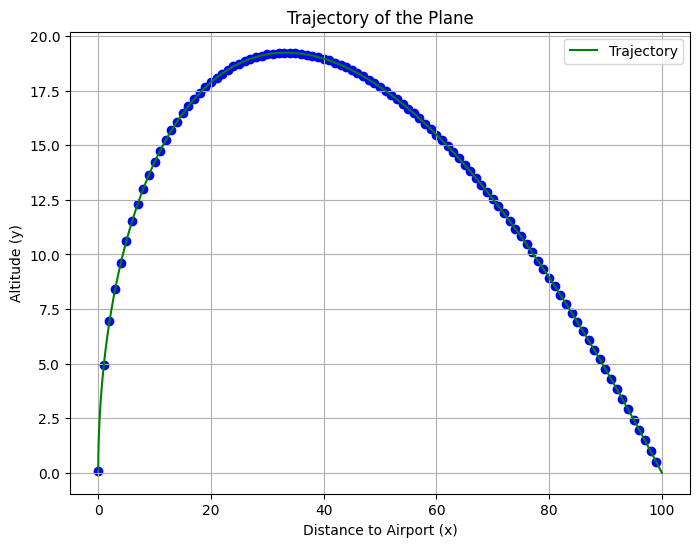

Coordinates (x, y) of 100 evenly spaced points: 
(0.00, 0.03)
(1.00, 4.95)
(2.00, 6.93)
(3.00, 8.40)
(4.00, 9.60)
(5.00, 10.62)
(6.00, 11.51)
(7.00, 12.30)
(8.00, 13.01)
(9.00, 13.65)
(10.00, 14.23)
(11.00, 14.76)
(12.00, 15.24)
(13.00, 15.68)
(14.00, 16.09)
(15.00, 16.46)
(16.00, 16.80)
(17.00, 17.11)
(18.00, 17.39)
(19.00, 17.65)
(20.00, 17.89)
(21.00, 18.10)
(22.00, 18.29)
(23.00, 18.46)
(24.00, 18.62)
(25.00, 18.75)
(26.00, 18.87)
(27.00, 18.97)
(28.00, 19.05)
(29.00, 19.12)
(30.00, 19.17)
(31.00, 19.21)
(32.00, 19.23)
(33.00, 19.24)
(34.00, 19.24)
(35.00, 19.23)
(36.00, 19.20)
(37.00, 19.16)
(38.00, 19.11)
(39.00, 19.05)
(40.00, 18.97)
(41.00, 18.89)
(42.00, 18.79)
(43.00, 18.69)
(44.00, 18.57)
(45.00, 18.45)
(46.00, 18.31)
(47.00, 18.17)
(48.00, 18.01)
(49.00, 17.85)
(50.00, 17.68)
(51.00, 17.50)
(52.00, 17.31)
(53.00, 17.11)
(54.00, 16.90)
(55.00, 16.69)
(56.00, 16.46)
(57.00, 16.23)
(58.00, 15.99)
(59.00, 15.75)
(60.00, 15.49)
(61.00, 15.23)
(62.00, 14.96)
(63.00, 14.68)
(64.00

In [51]:
import numpy as np
import matplotlib.pyplot as plt
# Defining Given Constants with a little bit of math 
a = 100 # Distance from airport
w = 44  # wind speed 
v_0 = 88 # initial velocity 
x_0 = a  # initial x_value 
y_0 = 0  # initial y_value 
h = 0.0001 # Step size used for difference approximation
k = w/v_0 # constant factor in ODE

def f(x, y):  
    """Differential Equation from ODE"""
    return (y/x) - (k * np.sqrt(1 + ((y/x) ** 2)))   

def euler_forward(f, x_0, y_0, h, target):  
    # Start Making Arrays to hold x_values and y_values of sequence
    x_values = [x_0] 
    y_values = [y_0]  

    # Condition is > target as we are decreasing x
    while x_values[-1] > target:  
        y_n = y_values[-1]  
        x_n = x_values[-1]  

        # Safegaurd to prevent approximation from overshooting
        if x_n - h < target: 
            h = x_n - target 
        
        # Euler Forward Sequences, - instead of + as h needs to be - 
        y_next = y_n - (h * f(x_n, y_n))
        x_next = x_n - h 

        # We append the values as we reference the last index in the equation for x_n, y_n
        y_values.append(y_next) 
        x_values.append(x_next)   
        
    # Reversed the arrays for ease of printing 
    return np.array(x_values[::-1]), np.array(y_values[::-1])

x_vals, y_vals = euler_forward(f, x_0, y_0, h, 0) 

# print(x_vals[0]) 
# print(y_vals[0])  
# print(len(x_vals)) 
# print(len(y_vals))

plt.figure(figsize=(8,6))  
plt.plot(x_vals[1::], y_vals[1::], color="green", label="Trajectory") 
plt.scatter(x_vals[1::int(len(x_vals)/100)], y_vals[1::int(len(x_vals)/100)], color="blue") 
plt.xlabel("Distance to Airport (x)") 
plt.ylabel("Altitude (y)") 
plt.title("Trajectory of the Plane") 
plt.legend() 
plt.grid(True) 
plt.show()

# Print Coordinates
print("Coordinates (x, y) of 100 evenly spaced points: ")  
step = len(x_vals) // 100
for i in range(0, len(x_vals), step): 
    print(f"({x_vals[i]:.2f}, {y_vals[i]:.2f})")


### Results 

I obtained the following Graph approximating the trajectory of the plane: 

![Problem_3.3_Trajectory_Graph](Problem_3.3_Trajectory_Graph.png)   

I also printed the following 100 points along the approximated trajectory: 
Coordinates (x, y) of 100 evenly spaced points:     
(0.00, 0.03)   
(1.00, 4.95)   
(2.00, 6.93)   
(3.00, 8.40)    
(4.00, 9.60)   
(5.00, 10.62)   
(6.00, 11.51)     
(7.00, 12.30)   
(8.00, 13.01)    
(9.00, 13.65)   
(10.00, 14.23)   
(11.00, 14.76)    
(12.00, 15.24)   
(13.00, 15.68)    
(14.00, 16.09)   
(15.00, 16.46)    
(16.00, 16.80)   
(17.00, 17.11)   
(18.00, 17.39)   
(19.00, 17.65)   
(20.00, 17.89)   
(21.00, 18.10)   
(22.00, 18.29)   
(23.00, 18.46)   
(24.00, 18.62)   
(25.00, 18.75)   
(26.00, 18.87)   
(27.00, 18.97)   
(28.00, 19.05)    
(29.00, 19.12)   
(30.00, 19.17)   
(31.00, 19.21)   
(32.00, 19.23)   
(33.00, 19.24)   
(34.00, 19.24)   
(35.00, 19.23)   
(36.00, 19.20)    
(37.00, 19.16)    
(38.00, 19.11)    
(39.00, 19.05)    
(40.00, 18.97)   
(41.00, 18.89)   
(42.00, 18.79)   
(43.00, 18.69)   
(44.00, 18.57)  
(45.00, 18.45)   
(46.00, 18.31)   
(47.00, 18.17)   
(48.00, 18.01)   
(49.00, 17.85)   
(50.00, 17.68)   
(51.00, 17.50)  
(52.00, 17.31)   
(53.00, 17.11)  
(54.00, 16.90)   
(55.00, 16.69)   
(56.00, 16.46)   
(57.00, 16.23)   
(58.00, 15.99)   
(59.00, 15.75)   
(60.00, 15.49)  
(61.00, 15.23)  
(62.00, 14.96)  
(63.00, 14.68)  
(64.00, 14.40)    
(65.00, 14.11)   
(66.00, 13.81)  
(67.00, 13.51)   
(68.00, 13.19)    
(69.00, 12.88)   
(70.00, 12.55)   
(71.00, 12.22)    
(72.00, 11.88)    
(73.00, 11.53)   
(74.00, 11.18)   
(75.00, 10.83)   
(76.00, 10.46)   
(77.00, 10.09)   
(78.00, 9.71)   
(79.00, 9.33)   
(80.00, 8.94)   
(81.00, 8.55)   
(82.00, 8.15)   
(83.00, 7.74)   
(84.00, 7.33)   
(85.00, 6.91)   
(86.00, 6.49)   
(87.00, 6.06)   
(88.00, 5.63)   
(89.00, 5.19)   
(90.00, 4.74)   
(91.00, 4.29)   
(92.00, 3.84)   
(93.00, 3.38)    
(94.00, 2.91)   
(95.00, 2.44)   
(96.00, 1.96)   
(97.00, 1.48)   
(98.00, 0.99)    
(99.00, 0.50)   
(100.00, 0.00)     

### Performance 
The performance of Euler's Forward Method is dependent on the number of points generated to show the trajectory of the plot, if we are generating n points then the time complexity is O(n) as we have to do 2n operations to calculate each point and the space complexity is O(n) as well as we need to store each point. In terms of Location Truncation Error, the error of Euler's forward method is order-1. 
